# Lead Scoring Case Study
GROUP MEMBERS:- 1. AKSHAY SIRASWAR (akshaysiraswar26@gmail.com) 2. NISHCHAY YADAV (nishchayyadav390@gmail.com)

Problem Statement : An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion. X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

# Goals and Objectives
There are quite a few goals for this case study.

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well.

# The steps are broadly:

1. Read and understand the data

2. Clean the data

3. EDA
4. Prepare the data for Model Building

5. Model Building

6. Model Evaluation

7. Optimising cutoff (ROC curve)

8. Making Predictions on the Test Set

9. Precision-Recall

10.Prediction on the Test Set

In [1]:
import warnings
warnings.filterwarnings('ignore')
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read and understand the data

In [2]:
df=pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
df.shape

(9240, 37)

In [5]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

As we can see there are lot of null values in the data sets. Therefore we need to clean the data

# 2. Data Cleaning


In [6]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

Now we can see there are variables with high null values. Hence we can drop the columns with greater than 40% null values as they are of no use to us.

In [7]:
for i in df.columns:
    if((100*(df[i].isnull().sum()/len(df.index))) >=40):
        df.drop(i, 1, inplace = True)

In [8]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [9]:
#drop Prospect ID and Lead Number as they have all the unique values.

df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

Categorical Attributes Analysis:

In [10]:
#checking value counts of columns
for c in df.columns:
    print(df[c].astype('category').value_counts())
    print("="*40)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64
No     8506
Yes     734
Name: Do Not Email, dtype: int64
No     9238
Yes       2
Name: Do Not Call, dtype: int64
0    5679
1    3561
Name: Converted, dtype: int64
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       7

We can drop many columns which are heavily skewed as they are redundant due to large count of single category or show high variance

In [11]:
# dropping unnecessary columns 
df.drop(["Magazine","Receive More Updates About Our Courses",
         "Update me on Supply Chain Content","Get updates on DM Content","Lead Profile",
        "I agree to pay the amount through cheque","Do Not Call","What matters most to you in choosing a course","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations","Search","Country"], axis=1,inplace=True)

In [12]:
df.isnull().sum()

Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
How did you hear about X Education        2207
What is your current occupation           2690
Tags                                      3353
City                                      1420
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [13]:
#Converting 'Select' values to NaN.

df = df.replace('Select', np.nan)

In [14]:
df.isnull().sum()

Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            3380
How did you hear about X Education        7250
What is your current occupation           2690
Tags                                      3353
City                                      3669
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [15]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                            36.58
How did you hear about X Education        78.46
What is your current occupation           29.11
Tags                                      36.29
City                                      39.71
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [16]:
#What is your current occupation
df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [17]:
#imputing Nan values with mode "Unemployed"

df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

In [18]:
#checking value counts

df['How did you hear about X Education'].value_counts(dropna=False)

NaN                      7250
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [19]:
#checking value counts

df['How did you hear about X Education'].value_counts(dropna=False)

NaN                      7250
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [20]:
df.drop(['How did you hear about X Education'], 1, inplace = True)

Grouping the categories to some useful categories

In [21]:
df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [22]:
#replacing Nan Values and combining low frequency values

df['Last Activity'] = df['Last Activity'].replace(np.nan,'Others')
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [23]:
# Last Activity:

df['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [24]:
df['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [25]:
#categorizing the low count categories into one category
df['What is your current occupation'] = df['What is your current occupation'].replace(["Student","Other","Housewife","Businessman"],"Students and Others")

In [26]:
df['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Students and Others      244
Name: What is your current occupation, dtype: int64

In [27]:
df['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [28]:
#dropping city column as null values are large
df.drop(['City'], 1, inplace = True)

In [29]:
df['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [30]:
# dropping the Tags variable as it contains large no. of null values
df.drop(['Tags'], 1, inplace = True)

In [31]:
df['TotalVisits'].value_counts(dropna=False)

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
NaN       137
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
24.0        5
27.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
141.0       1
41.0        1
55.0        1
115.0       1
32.0        1
54.0        1
42.0        1
251.0       1
74.0        1
43.0        1
30.0        1
Name: TotalVisits, dtype: int64

In [32]:
# Drop the null value rows in the column 'TotalVisits'

df = df[~pd.isnull(df['TotalVisits'])]
df = df[~pd.isnull(df['Lead Source'])]
df = df[~pd.isnull(df['Page Views Per Visit'])]

In [33]:
df['Specialization'].value_counts(dropna=False)

NaN                                  3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
Hospitality Management                111
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [34]:
# categorizing all the management courses into Management Specialization:
df.loc[(df.Specialization == 'Finance Management') | (df.Specialization == 'Human Resource Management') | 
       (df.Specialization == 'Marketing Management') |  (df.Specialization == 'Operations Management') |
       (df.Specialization == 'IT Projects Management') | (df.Specialization == 'Supply Chain Management') |
       (df.Specialization == 'Healthcare Management') | (df.Specialization == 'Hospitality Management') |
       (df.Specialization == 'Retail Management') , 'Specialization'] = 'Management Specializations'

# categorizing all the busines courses into Business Specialization:
df.loc[(df.Specialization == 'Business Administration') | (df.Specialization == 'International Business') | 
       (df.Specialization == 'Rural and Agribusiness') | (df.Specialization == 'E-Business') 
        , 'Specialization'] = 'Business Specializations'

# categorizing all the industry courses into Industry Specialization:
df.loc[(df.Specialization == 'Banking, Investment And Insurance') | (df.Specialization == 'Media and Advertising') |
       (df.Specialization == 'Travel and Tourism') | (df.Specialization == 'Services Excellence') |
       (df.Specialization == 'E-COMMERCE'), 'Specialization'] = 'Industry Specializations'

In [35]:
df['Specialization'].value_counts(dropna=False)


Management Specializations    4197
NaN                           3282
Industry Specializations       890
Business Specializations       705
Name: Specialization, dtype: int64

Now we can replace NaN values with Management specialization

In [36]:
df.Specialization.value_counts(normalize = True) * 100

Management Specializations    72.462017
Industry Specializations      15.366022
Business Specializations      12.171961
Name: Specialization, dtype: float64

In [37]:
# imputing null values proportionately
df['Specialization'] = df.Specialization.fillna(pd.Series(np.random.choice(['Management Specializations',  
                                                    'Business Specializations', 'Industry Specializations'], 
                                                                   p = [0.7246, 0.1217, 0.1537 ], size = len(df))))

In [38]:
df.Specialization.value_counts(normalize = True) * 100

Management Specializations    72.636595
Industry Specializations      14.895268
Business Specializations      12.468137
Name: Specialization, dtype: float64

In [39]:
df.isnull().sum()

Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            51
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [40]:
df = df[~pd.isnull(df['Specialization'])]

In [41]:
df.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [42]:
print(len(df.index))
print(len(df.index)/9240)

9023
0.9765151515151516


In [43]:
df.shape

(9023, 12)

# 3. Exploratory Data Analysis

In [44]:
df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9023.000000,9023.000000,9023.000000,9023.000000
mean,0.379364,3.467694,484.417710,2.378679
std,0.485256,4.866772,545.506797,2.162427
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,247.000000,2.000000
75%,1.000000,5.000000,927.500000,3.330000
max,1.000000,251.000000,2272.000000,55.000000


Checking for Outliers

<AxesSubplot:xlabel='Total Time Spent on Website'>

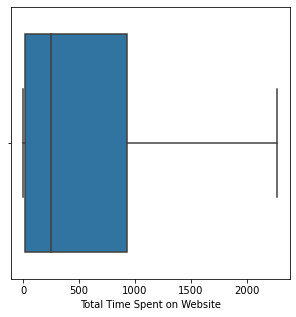

In [45]:
plt.figure(figsize = (5, 5))


sns.boxplot(x = "Total Time Spent on Website", data = df)

<AxesSubplot:xlabel='Page Views Per Visit'>

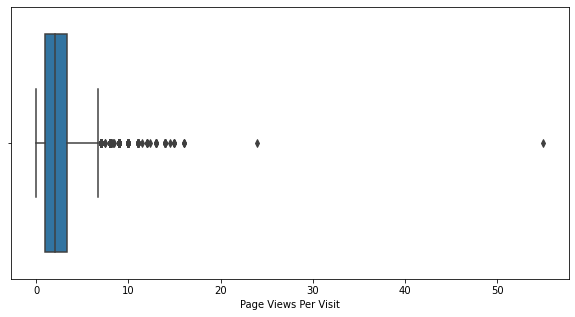

In [46]:
plt.figure(figsize = (10, 5))

sns.boxplot(x = "Page Views Per Visit", data = df)


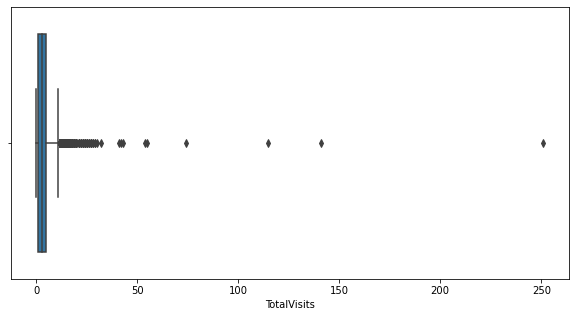

In [47]:
plt.figure(figsize = (10, 5))

sns.boxplot(x = "TotalVisits", data = df)
plt.show()


Inference:

Looking at both the box plots there are upper bound outliers in both TotalVisits and Page Views Per Visit columns. We can also see that the data can be capped at 99 percentile.

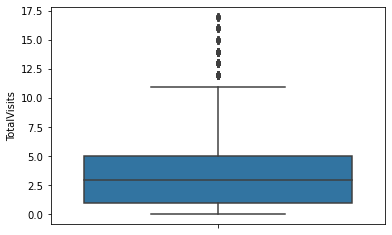

In [48]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = df.TotalVisits.quantile(0.99)
df = df[(df.TotalVisits <= Q3)]
Q1 = df.TotalVisits.quantile(0.01)
df = df[(df.TotalVisits >= Q1)]
sns.boxplot(y=df['TotalVisits'])
plt.show()


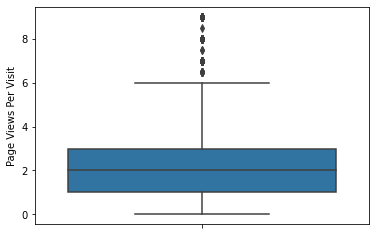

In [49]:
Q3 = df['Page Views Per Visit'].quantile(0.99)
df = df[df['Page Views Per Visit'] <= Q3]
Q1 = df['Page Views Per Visit'].quantile(0.01)
df = df[df['Page Views Per Visit'] >= Q1]
sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

In [50]:
df.shape

(8873, 12)

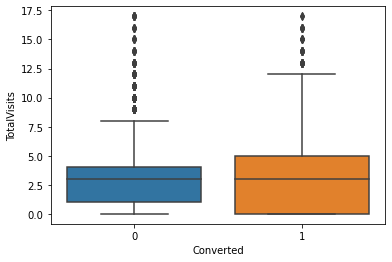

In [51]:
#checking Spread of "TotalVisits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)
plt.show()


Inference:

There are almost same average no. of people who converted or not into lead.

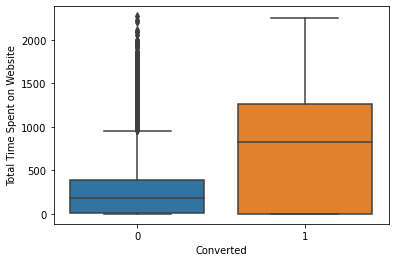

In [52]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=df.Converted, y=df['Total Time Spent on Website'])
plt.show()

Inference:

1. People spending more time on website are more likely to get converted.

2. Focus should be on website management.

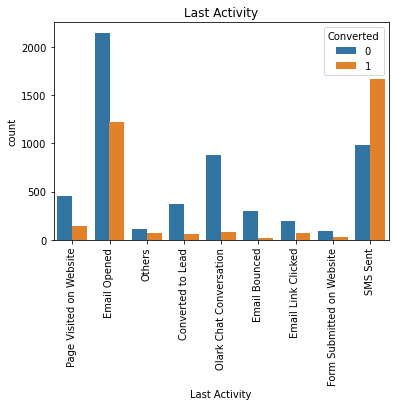

In [53]:
sns.countplot(x='Last Activity', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

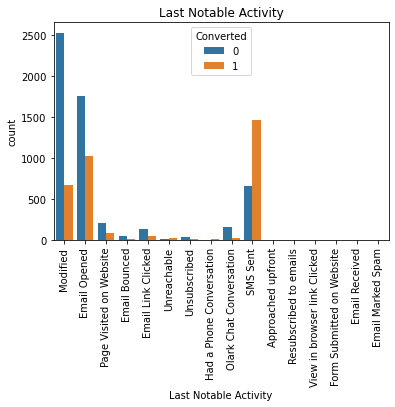

In [54]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

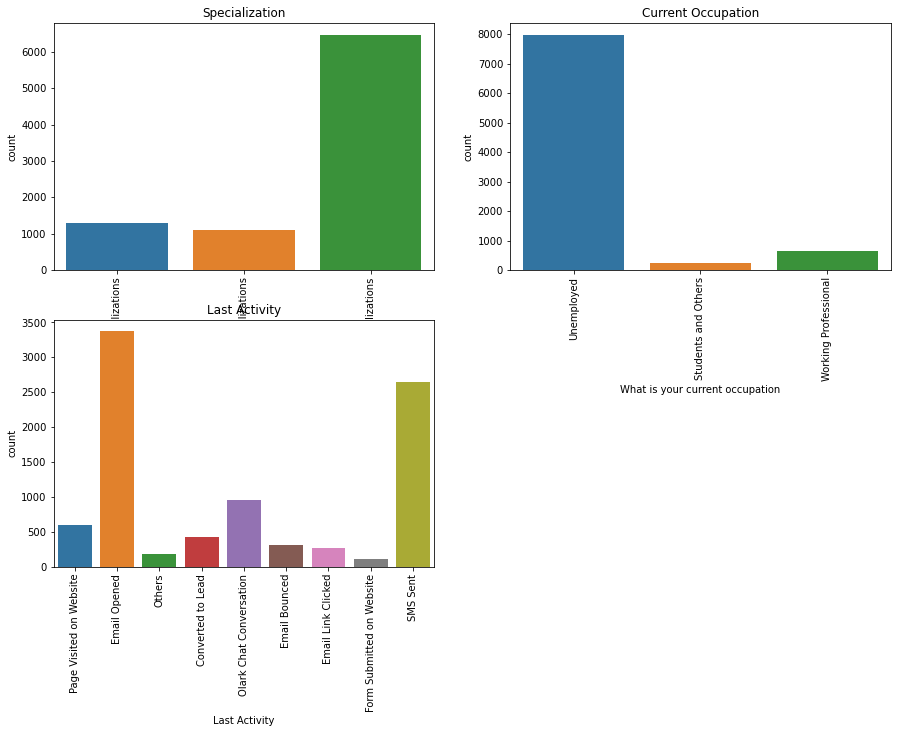

In [55]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
sns.countplot(df['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(2,2,2)
sns.countplot(df['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(2,2,3)
sns.countplot(df['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

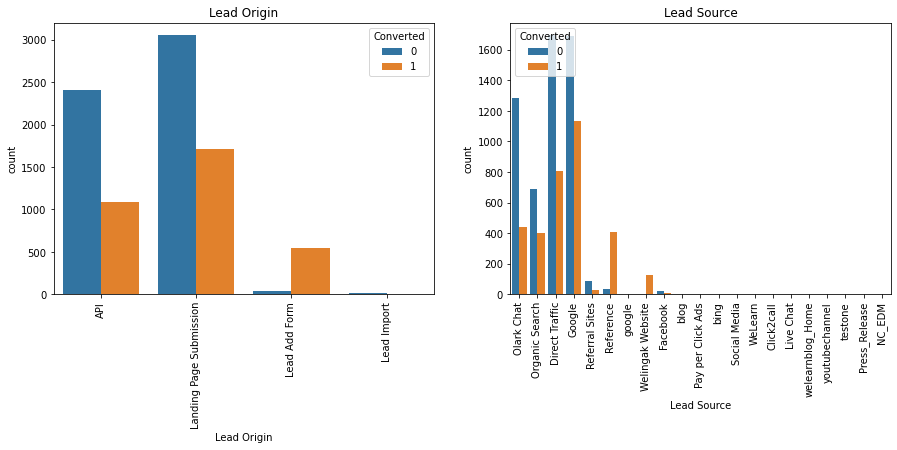

In [56]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

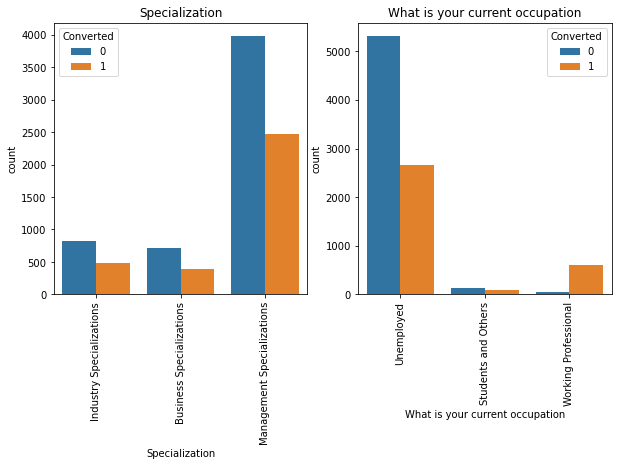

In [57]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

Inference:

Management secialization are most potential leads that can be converted into hot leads.

Among the occupation the unemployed can be potential hot leads.

Checking for the multicollinearity

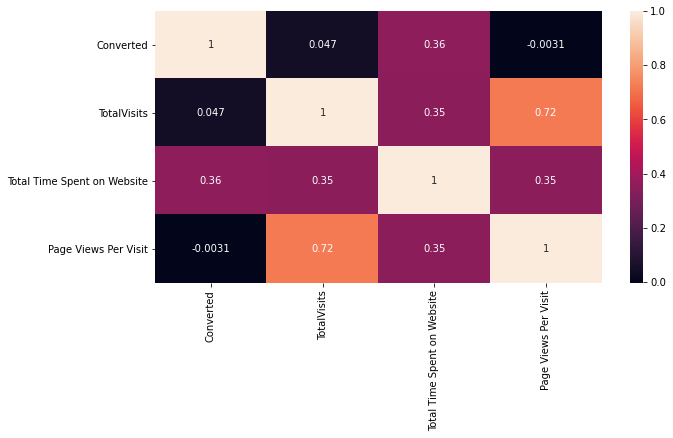

In [58]:
# checking the correlation among continous variables
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)
plt.show()


Inference:

There seems to multicollinearity between TotalVisits and Page Views Per Visit

In [59]:
df.drop(['Page Views Per Visit'], 1, inplace = True)

In [60]:
df.describe()

,Converted,TotalVisits,Total Time Spent on Website
count,8873.000000,8873.000000,8873.000000
mean,0.378339,3.163192,480.823284
std,0.485000,2.902839,544.641794
min,0.000000,0.000000,0.000000
25%,0.000000,1.000000,9.000000
50%,0.000000,3.000000,244.000000
75%,1.000000,5.000000,918.000000
max,1.000000,17.000000,2272.000000


# 4. DATA PREPARATION

Dummy Variable Creation:

In [61]:
df.loc[:, df.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [62]:
# Create dummy variables 
dummy = pd.get_dummies(df[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
df_final_dum = pd.concat([df, dummy], axis=1)
df_final_dum

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,0,0.0,0,Page Visited on Website,Industry Specializations,Unemployed,No,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,0,5.0,674,Email Opened,Business Specializations,Unemployed,No,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,Email Opened,Business Specializations,Students and Others,Yes,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,Others,Industry Specializations,Unemployed,No,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,Converted to Lead,Management Specializations,Unemployed,No,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,1,8.0,1845,Others,Management Specializations,Unemployed,No,...,0,0,0,0,0,0,0,0,0,0
9236,Landing Page Submission,Direct Traffic,No,0,2.0,238,SMS Sent,Industry Specializations,Unemployed,Yes,...,0,0,0,0,0,0,1,0,0,0
9237,Landing Page Submission,Direct Traffic,Yes,0,2.0,199,SMS Sent,Business Specializations,Unemployed,Yes,...,0,0,0,0,0,0,1,0,0,0
9238,Landing Page Submission,Google,No,1,3.0,499,SMS Sent,Management Specializations,Unemployed,No,...,0,0,0,0,0,0,1,0,0,0


In [63]:
df_final_dum = df_final_dum.drop(['Lead Origin', 'Lead Source', 'Do Not Email','Last Activity', 'Specialization','What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
df_final_dum

,Converted,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Industry Specializations,Specialization_Management Specializations,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,1,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


Train-Test split

In [64]:
# Importing the required library
from sklearn.model_selection import train_test_split

In [65]:
X = df_final_dum.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Industry Specializations,Specialization_Management Specializations,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [66]:
# Putting the target variable in y
y = df_final_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [67]:
# Splitting the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [68]:
# Importing MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Industry Specializations,Specialization_Management Specializations,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7121,0.235294,0.496729,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6889,0.000000,0.000000,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
773,0.176471,0.126636,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8193,0.000000,0.000000,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6074,0.000000,0.000000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 5. Model Building

In [69]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [70]:
# Importing RFE
from sklearn.feature_selection import RFE

In [71]:
# Running RFE with 15 variables as output
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [72]:
# Features selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Lead Origin_Landing Page Submission', False, 24),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Specialization_Industry Specializations', False, 33),
 ('Specialization_Management Specializations', False, 29),
 ('Lead Source_Direct Traffic', False, 5),
 ('Lead Source_Facebook', False, 34),
 ('Lead Source_Google', False, 8),
 ('Lead Source_Live Chat', False, 23),
 ('Lead Source_NC_EDM', False, 16),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 6),
 ('Lead Source_Pay per Click Ads', False, 25),
 ('Lead Source_Press_Release', False, 35),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 7),
 ('Lead Source_Social Media', False, 28),
 ('Lead Source_WeLearn', False, 17),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 30),
 ('Lead Source_blog', False, 12),
 ('Lead Source_google', False, 4),
 ('Lead Sourc

In [73]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [74]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [75]:
# Importing statsmodels
import statsmodels.api as sm

# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

Model1:

In [76]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6211
Model:                            GLM   Df Residuals:                     6195
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2552.9
Date:                Wed, 08 Dec 2021   Deviance:                       5105.8
Time:                        16:04:23   Pearson chi2:                 6.40e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.8255      0.098    -28.821      0.000      -3.018      -2.633
TotalVisits                                              1.2940      0.249      5.195      0.000       0.806       1.782
Total Time Spent on Website                              4.5747      0.163     27.998      0.000       4.254       4.895
Lead Origin_Lead Add Form                                2.3452      0.971      2.416      0.016       0.442       4.248
Lead Origin_Lead Import                                  2.0958      0.467      4.488      0.000       1.181       3.011
Lead Source_Olark Chat                                   1.6689      0.120     13.957      0.000       1.435       1.903
Lead Source_Reference                                    2.1058      0.995      2.116      0.034       0.155       4.056
Lead Source_Welingak Website                             4.1125      1.211      3.396      0.001       1.739       6.486
Do Not Email_Yes                                        -1.8355      0.199     -9.213      0.000      -2.226      -1.445
Last Activity_Olark Chat Conversation                   -1.6343      0.178     -9.185      0.000      -1.983      -1.286
Last Activity_Others                                     0.1814      0.307      0.590      0.555      -0.421       0.784
What is your current occupation_Working Professional     2.8254      0.195     14.489      0.000       2.443       3.208
Last Notable Activity_Email Bounced                      0.7888      0.535      1.473      0.141      -0.261       1.838
Last Notable Activity_Had a Phone Conversation           2.3756      1.301      1.826      0.068      -0.174       4.925
Last Notable Activity_SMS Sent                           1.6441      0.082     20.152      0.000       1.484       1.804
Last Notable Activity_Unreachable                        1.6501      0.652      2.531      0.011       0.372       2.928
========================================================================================================================
"""

We can drop the variables having more than 0.05 p-value

In [77]:
X_train.drop('Last Activity_Others', axis = 1, inplace = True)

Model 2:

In [78]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6211
Model:                            GLM   Df Residuals:                     6196
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2553.1
Date:                Wed, 08 Dec 2021   Deviance:                       5106.2
Time:                        16:04:24   Pearson chi2:                 6.40e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.8229      0.098    -28.825      0.000      -3.015      -2.631
TotalVisits                                              1.2966      0.249      5.204      0.000       0.808       1.785
Total Time Spent on Website                              4.5749      0.163     27.999      0.000       4.255       4.895
Lead Origin_Lead Add Form                                2.3441      0.971      2.415      0.016       0.442       4.246
Lead Origin_Lead Import                                  2.0933      0.467      4.483      0.000       1.178       3.009
Lead Source_Olark Chat                                   1.6680      0.120     13.951      0.000       1.434       1.902
Lead Source_Reference                                    2.1086      0.995      2.119      0.034       0.158       4.059
Lead Source_Welingak Website                             4.1072      1.211      3.392      0.001       1.734       6.480
Do Not Email_Yes                                        -1.8153      0.196     -9.264      0.000      -2.199      -1.431
Last Activity_Olark Chat Conversation                   -1.6366      0.178     -9.201      0.000      -1.985      -1.288
What is your current occupation_Working Professional     2.8267      0.195     14.499      0.000       2.445       3.209
Last Notable Activity_Email Bounced                      0.7654      0.534      1.434      0.152      -0.281       1.812
Last Notable Activity_Had a Phone Conversation           2.5540      1.265      2.019      0.044       0.074       5.034
Last Notable Activity_SMS Sent                           1.6400      0.081     20.181      0.000       1.481       1.799
Last Notable Activity_Unreachable                        1.8284      0.578      3.164      0.002       0.696       2.961
========================================================================================================================
"""

In [79]:
X_train.drop('Last Notable Activity_Email Bounced', axis = 1, inplace = True)

In [80]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,59.36
5,Lead Source_Reference,45.49
6,Lead Source_Welingak Website,15.03
1,Total Time Spent on Website,1.94
0,TotalVisits,1.88
4,Lead Source_Olark Chat,1.41
8,Last Activity_Olark Chat Conversation,1.39
11,Last Notable Activity_SMS Sent,1.39
9,What is your current occupation_Working Profes...,1.19
7,Do Not Email_Yes,1.05


In [81]:
X_train.drop('Lead Origin_Lead Add Form', axis = 1, inplace = True)

Model 3:

In [82]:
# Refit the model 
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6211
Model:                            GLM   Df Residuals:                     6198
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2557.1
Date:                Wed, 08 Dec 2021   Deviance:                       5114.3
Time:                        16:04:24   Pearson chi2:                 6.42e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.8106      0.098    -28.804      0.000      -3.002      -2.619
TotalVisits                                              1.2799      0.248      5.155      0.000       0.793       1.766
Total Time Spent on Website                              4.5650      0.163     27.993      0.000       4.245       4.885
Lead Origin_Lead Import                                  2.0809      0.467      4.457      0.000       1.166       2.996
Lead Source_Olark Chat                                   1.6619      0.119     13.935      0.000       1.428       1.896
Lead Source_Reference                                    4.4360      0.245     18.081      0.000       3.955       4.917
Lead Source_Welingak Website                             6.4520      0.733      8.806      0.000       5.016       7.888
Do Not Email_Yes                                        -1.7330      0.183     -9.472      0.000      -2.092      -1.374
Last Activity_Olark Chat Conversation                   -1.6424      0.178     -9.239      0.000      -1.991      -1.294
What is your current occupation_Working Professional     2.8337      0.196     14.479      0.000       2.450       3.217
Last Notable Activity_Had a Phone Conversation           2.5459      1.265      2.013      0.044       0.067       5.025
Last Notable Activity_SMS Sent                           1.6347      0.081     20.172      0.000       1.476       1.794
Last Notable Activity_Unreachable                        1.8231      0.578      3.155      0.002       0.691       2.956
========================================================================================================================
"""

Now all p-values are under 0.05 so now we check the vif values

In [83]:
## checking again the vif score
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Time Spent on Website,1.94
0,TotalVisits,1.88
3,Lead Source_Olark Chat,1.41
7,Last Activity_Olark Chat Conversation,1.39
10,Last Notable Activity_SMS Sent,1.39
8,What is your current occupation_Working Profes...,1.19
4,Lead Source_Reference,1.14
6,Do Not Email_Yes,1.05
5,Lead Source_Welingak Website,1.02
11,Last Notable Activity_Unreachable,1.01


Now we have eliminated all the insignificant variables 

# 6. Model Evaluation

In [84]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7121    0.930331
6889    0.057809
773     0.118509
8193    0.963035
6074    0.240729
5212    0.856138
3667    0.587995
2789    0.931378
7827    0.162213
6704    0.071532
dtype: float64

In [85]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.9303313 , 0.0578095 , 0.11850882, 0.96303546, 0.24072874,
       0.85613765, 0.58799461, 0.93137842, 0.16221287, 0.0715323 ])

In [86]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.930331
1,0,0.057809
2,0,0.118509
3,0,0.963035
4,1,0.240729


In [87]:
# Substituting 0 or 1 with the cut off value as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.930331,1
1,0,0.057809,0
2,0,0.118509,0
3,0,0.963035,1
4,1,0.240729,0


In [88]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3418,  438],
       [ 728, 1627]], dtype=int64)

In [89]:
# Checking the accuracy score
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8122685557881179

In [90]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [91]:
# Calculating the sensitivity
TP/(TP+FN)

0.6908704883227176

In [92]:
# Calculating the specificity
TN/(TN+FP)

0.8864107883817427

With our guess cutoff as 0.5, we have accuracy around 81%, sensitivity at 69% and specificity at 89%.

# 7. Optimising cutoff(ROC curve)

The previous cut off was randomely selected so now we will find the optimum cutoff value.

In [93]:

# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


In [94]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Conversion_Prob,
                                         drop_intermediate = False )

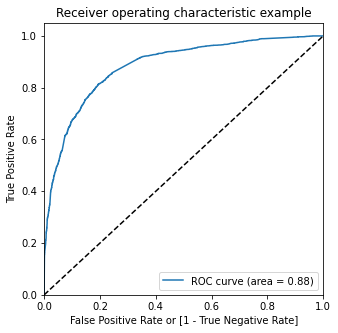

In [95]:
# Calling the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The ROC curve area is 0.88 which is a very good value. The value more close to 1 is considered as good value for model.

In [96]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.930331,1,1,1,1,1,1,1,1,1,1,1
1,0,0.057809,0,1,0,0,0,0,0,0,0,0,0
2,0,0.118509,0,1,1,0,0,0,0,0,0,0,0
3,0,0.963035,1,1,1,1,1,1,1,1,1,1,1
4,1,0.240729,0,1,1,1,0,0,0,0,0,0,0


In [97]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.379166,1.000000,0.000000
0.1,0.1,0.608276,0.963907,0.391079
0.2,0.2,0.750926,0.920170,0.647562
0.3,0.3,0.800032,0.832272,0.780342
0.4,0.4,0.813396,0.771975,0.838693
0.5,0.5,0.812269,0.690870,0.886411
0.6,0.6,0.806472,0.620807,0.919865
0.7,0.7,0.781839,0.506582,0.949948
0.8,0.8,0.766543,0.432696,0.970436
0.9,0.9,0.718081,0.273461,0.989627


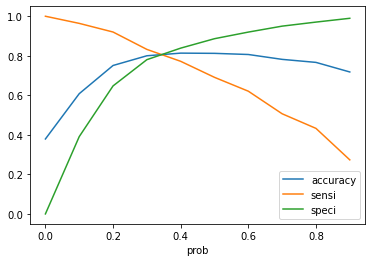

In [98]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

We manage to get optimal cutoff at around 0.35

In [99]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.930331,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.057809,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.118509,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.963035,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.240729,0,1,1,1,0,0,0,0,0,0,0,0


In [100]:
# Checking the accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8093704717436806

In [101]:
# building the confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3140,  716],
       [ 468, 1887]], dtype=int64)

In [102]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [103]:
# Calculating sensitivity
TP/(TP+FN)

0.8012738853503185

In [104]:
# Calculating specificity
TN/(TN+FP)

0.8143153526970954

With the optimal cutoff value(0.35) we are getting the various metrics as:

accuracy= 81%

sensitivity= 80%

specificity= 81%

# 8. Making Predictions on the Test Set

In [105]:
# Scaling numeric variables
X_test[['TotalVisits', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website']])

In [106]:
# Substituting all columns in the final train model
col = X_train.columns
# Selecting the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
1284,1.0,0.176471,0.229439,0,0,0,0,0,0,0,0,0,0
1797,1.0,0.235294,0.168224,0,0,0,0,0,0,0,0,0,0
5448,1.0,0.235294,0.727570,0,0,0,0,0,0,0,0,1,0
8890,1.0,0.117647,0.577103,0,0,0,0,0,0,0,0,0,0
1807,1.0,0.117647,0.989252,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,1.0,0.117647,0.476168,0,0,0,0,0,0,1,0,1,0
2625,1.0,0.352941,0.139720,0,0,0,0,0,0,0,0,0,0
3967,1.0,0.117647,0.179907,0,0,0,0,1,0,0,0,0,0
331,1.0,0.411765,0.421028,0,0,0,0,0,0,0,0,0,0


In [107]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.176924
1,0,0.149124
2,1,0.920316
3,0,0.493617
4,0,0.553189


In [108]:
# predicting using cut off value as 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.176924,0
1,0,0.149124,0
2,1,0.920316,1
3,0,0.493617,1
4,0,0.553189,1
...,...,...,...
2657,1,0.981695,1
2658,0,0.151737,0
2659,0,0.027337,0
2660,1,0.410577,1


In [109]:
# Checking the accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7967693463561232

In [110]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1318,  342],
       [ 199,  803]], dtype=int64)

In [111]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [112]:
# Calculating the sensitivity
TP/(TP+FN)

0.8013972055888223

In [113]:
# Calculating the specificity
TN/(TN+FP)

0.7939759036144578

# 9. Precision-Recall

In [114]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3418,  438],
       [ 728, 1627]], dtype=int64)

In [115]:
# Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7878934624697337

In [116]:
#Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6908704883227176

In [117]:
from sklearn.metrics import precision_recall_curve

In [118]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

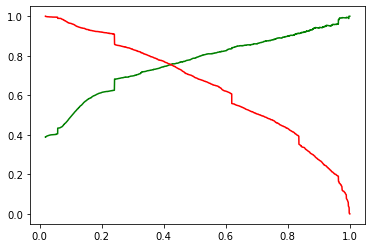

In [119]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [120]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()


,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.930331,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.057809,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.118509,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.963035,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.240729,0,1,1,1,0,0,0,0,0,0,0,0


In [121]:
# Accuracy score
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.814683625825149

In [122]:
# Create confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3276,  580],
       [ 571, 1784]], dtype=int64)

In [123]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [124]:
# Precision 
TP / (TP + FP)


0.754653130287648

In [125]:
#Recall 
TP / (TP + FN)

0.7575371549893843

With the cutoff value of 0.42 we have our metrics as :

Accuracy= 81.4%

Recall= 76%

Precision= 75%

# 10. Prediction on Test set

In [126]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.176924
1,0,0.149124
2,1,0.920316
3,0,0.493617
4,0,0.553189


In [127]:
# Making prediction using cut off 0.42
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final


,Converted,Conversion_Prob,final_predicted
0,0,0.176924,0
1,0,0.149124,0
2,1,0.920316,1
3,0,0.493617,1
4,0,0.553189,1
...,...,...,...
2657,1,0.981695,1
2658,0,0.151737,0
2659,0,0.027337,0
2660,1,0.410577,0


In [128]:
# Checking  accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.79526671675432

In [129]:
# Create confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1376,  284],
       [ 261,  741]], dtype=int64)

In [130]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [131]:
# Precision 
TP / (TP + FP)

0.7229268292682927

In [132]:
#Recall 
TP / (TP + FN)

0.7395209580838323

On the test set we have our metrics as:

Accuracy= 80%

Recall= 74%

Precision= 72%

These values shows that our model is stable and good for evaluation

# Conclusion

It was found that the variables that matter the most in the potential buyers are:

1. TotalVisists

2. The total time spend on the Website.

3. Lead Origin_Lead Add Form

4. When the lead source was:

   a. Olark chat

   b. Reference

   c. Welingak Website

5. When the last activity was:

   a. Olark chat conversation

6. When their current occupation is as a working professional.

7. Last Notable Activity_Had a Phone Conversation

Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and become a hot lead.

We should contact the person who spend more time on website. 

Special attention on the people who have lead source as Olark chat, reference, and welingal website by mentoring them for the course.

emphasis should be on working professionals and unemployed people.

People with last activity as olark chat conversation can be potential buyers of the course.

Focus more on people with last notable activity as phone conversation and SMS sent